In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- 1. 设置模拟参数 ---
# 空间网格点数
N = 41
# 模拟的总时长
T_end = 1.0
# 粘度系数
nu = 0.1
# 时间步长
dt = 0.005
# 空间网格的长度
L = 10.0
# 空间步长
dx = L / (N - 1)
# 总的时间步数
num_steps = int(T_end / dt)

In [3]:
# --- 2. 初始化网格和初始条件 ---
# 创建空间网格
x = np.linspace(0, L, N)
# 创建初始速度场 u
# 初始条件: u(x, 0) = sin(pi * x)
u = np.sin(np.pi * x)
# 创建一个列表来存储不同时间点的速度场，用于绘图
solutions = [u.copy()]

In [5]:
# --- 3. 主循环: 时间步进 ---
print("开始计算...")
for n in range(num_steps):
    # 创建一个临时数组，存储下一个时间步的解
    u_new = u.copy()
    
    # 遍历所有内部网格点 (i=1 到 N-2)
    for i in range(1, N - 1):
        # 这是有限差分法的核心，实现迭代公式
        # 注意: np.diff() 等函数可以简化，但这里我们使用最基础的循环
        
        # 对流项 (非线性项)
        convection_term = u[i] * (u[i+1] - u[i-1]) / (2 * dx)
        
        # 扩散项 (粘性项)
        diffusion_term = nu * (u[i+1] - 2 * u[i] + u[i-1]) / (dx**2)
        
        # 应用迭代公式计算下一个时间步的解
        u_new[i] = u[i] - dt * convection_term + dt * diffusion_term
    
     # --- 4. 设置边界条件 ---
    # 这里我们使用固定边界条件，u 在两端始终为 0
    u_new[0] = 0
    u_new[-1] = 0
    # 将新计算的解赋值给 u，准备进入下一个时间步
    u = u_new
    # 每隔一定步数保存一次结果，用于绘图
    if (n + 1) % 50 == 0:
        solutions.append(u.copy())
print("计算完成。")

开始计算...
计算完成。


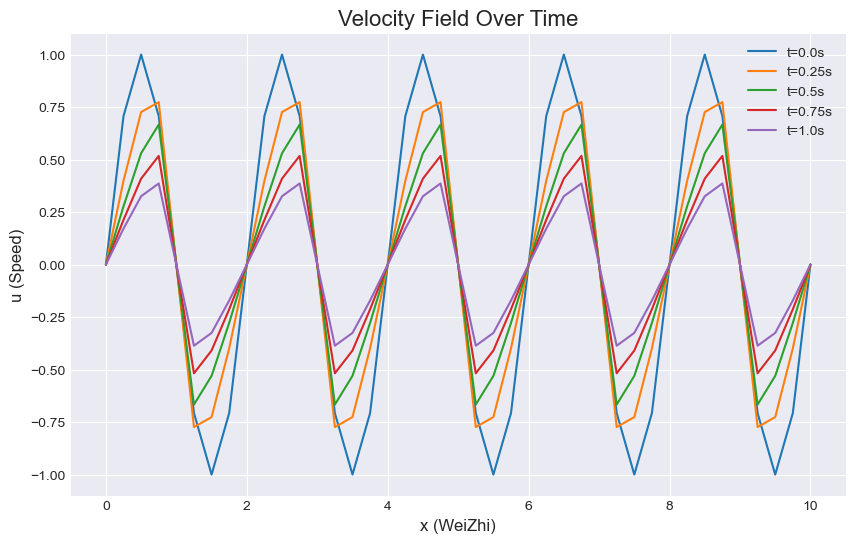

In [8]:
# --- 5. 可视化结果 ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 6))

for sol in solutions:
    plt.plot(x, sol)
plt.title('Velocity Field Over Time', fontsize=16)
plt.xlabel('x (WeiZhi)', fontsize=12)
plt.ylabel('u (Speed)', fontsize=12)
plt.legend([f't={round(i*50*dt, 2)}s' for i in range(len(solutions))])
plt.show()


In [9]:
# stage2_2_finite_difference2
# --- 1. 设置模拟参数 ---
# 空间域参数
nx = 101             # 空间点数
L = 2.0              # 空间长度 (米)
dx = L / (nx - 1)    # 空间步长 (米)

# 时间域参数
nt = 250             # 总时间步数
dt = 0.001           # 每个时间步的大小 (秒)
# 物理参数
nu = 0.01            # 粘性系数

print(f"参数设置：\n空间点数 nx={nx}, 空间长度 L={L}, 空间步长 dx={dx:.4f}")
print(f"时间步数 nt={nt}, 时间步长 dt={dt}\n粘性系数 nu={nu}")


参数设置：
空间点数 nx=101, 空间长度 L=2.0, 空间步长 dx=0.0200
时间步数 nt=250, 时间步长 dt=0.001
粘性系数 nu=0.01


开始求解伯格斯方程...
计算完成。


d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


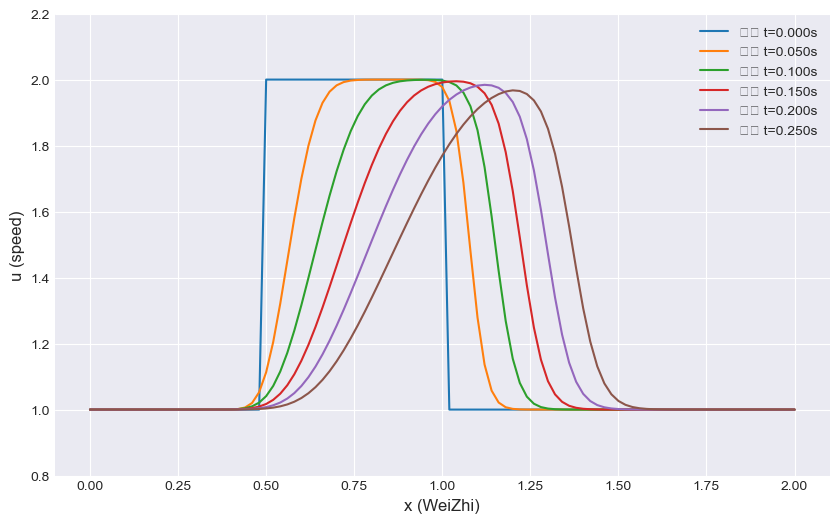

In [10]:
# --- 2. 定义初始条件 ---
# 创建一个 numpy 数组 u，长度为 nx
u = np.ones(nx)

# 设置“方波”初始条件：在 x=0.5 到 x=1.0 的区域，速度为 2.0
# 计算方波的起始和结束索引
start_idx = int(0.5 / dx)
end_idx = int(1.0 / dx + 1)
u[start_idx:end_idx] = 2.0

# 存储用于绘图的解，包括初始条件
solutions = [u.copy()]

# --- 3. 实现时间循环 ---
print("开始求解伯格斯方程...")
for n in range(nt):
    # 复制当前的 u，作为 un 来进行计算，避免在循环中污染当前值
    un = u.copy()
    
    # 遍历所有内部空间点 i (从 1 到 nx-1)
    for i in range(1, nx - 1):
        # 核心迭代公式：
        # u[i] = un[i] - (un[i] * dt / dx) * (un[i] - un[i-1])  + (nu * dt / dx**2) * (un[i+1] - 2*un[i] + un[i-1])
        #             ^----------- 对流项 -----------^           ^--------- 扩散项 ---------^
        
        # 对流项 (非线性项)
        convection_term = un[i] * (un[i] - un[i-1]) / dx
        
        # 扩散项 (粘性项)
        diffusion_term = nu * (un[i+1] - 2*un[i] + un[i-1]) / dx**2
        
        # 应用迭代公式计算下一个时间步的解
        u[i] = un[i] - dt * convection_term + dt * diffusion_term
        
    # 每隔 50 步保存一次结果，用于动态展示演化过程
    if (n + 1) % 50 == 0:
        solutions.append(u.copy())
        
print("计算完成。")
        
# --- 4. 可视化结果 ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 6))

# 绘制不同时间步的解
for i, sol in enumerate(solutions):
    time = (i * 50 * dt) if i > 0 else 0
    plt.plot(np.linspace(0, L, nx), sol, label=f'时间 t={time:.3f}s')

plt.title('', fontsize=16)
plt.xlabel('x (WeiZhi)', fontsize=12)
plt.ylabel('u (speed)', fontsize=12)
plt.legend()
plt.ylim(0.8, 2.2) # 调整 y 轴范围以便观察
plt.show()
